# 파이썬으로 배우는 기계학습
# Machine Learning with Python

# 제 11-2 강: MNIST 데이터셋

## 학습목표 
- MNIST Dataset이 무엇인지 이해한다.
- MNIST Dataset을 사용하는 방법을 익힌다.
- MNIST Dataset을 학습하는 신경망을 설계해본다.

## 학습 내용
- MNIST 자료 개요
- MNIST 자료 읽기
- MNSIT 자료 전처리
- MNIST 신경망 설계
- 원-핫-인코딩(one-hot encoding)


## 1. MNIST 데이터셋의 개요

여러분은 컴퓨터 프로그래밍을 처음 배울 때를 어떤 프로그램을 제일 먼저 작성했는지 기억이 나는지요? 누구든지 어떤 프로그래밍 언어를 처음 접할 때 시도해보는 것은 "Hello World!"를 출력하는 프로그램을 작성해보는 것입니다.  일종의 전통이죠. "Hello World! 프로그램을 500개도 넘게 모아 둔 [웹사이트](http://helloworldcollection.de/)도 있더군요. 기계학습에 비슷한 전통이 생기는 것 같습니다.  기계학습을 처음 배울 때, 누구나 한번은 시도해보는 것이 바로 MNIST(엠니스트) 데이터셋을 다루는 일입니다. 

[MNIST(National Institute of Standards and Technology)자료](http://yann.lecun.com/exdb/mnist/)는 다음과 같이 손으로 쓴 숫자들의 이미지를 압축하여 한 파일에 모아둔 것입니다. 또한 각 숫자가 어떤 숫자인지 알려주는 각 (클래스)레이블 파일이 있습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MNIST50419.png?raw=true" width="600">
<center>그림 1: MNIST 데이터셋의 첫 5장의 이미지</center>

이번 강의에서는 이러한 MNIST 데이터셋으로 신경망 모델을 훈련하고, 새로운 데이터셋으로 신경망 모델을 테스트해볼 것입니다. 우리의 목적은 최고의 성능을 자랑한는 신경망 모델을 만드는 것이 아니라 인위적인 자료가 아니라 범용으로 사용되는 실전 자료로 신경망을 모델링하는데 목적이 있습니다. 

## 2. MNIST 자료 전처리

MINST 데이터셋은 우리가 신경망 모델의 훈련에 사용할 수 있는 이미지가 60,000장, 테스트를 위하여 따로 구별된 이미지가 10,000장 준비되어 있습니다. 일반적으로 훈련용 이미지를 사용하여 신경망 모델을 학습시킵니다.  그 후, 훈련을 끝낸 모델을 가지고 테스트 이미지들을 얼마나 정확하게 분류하는지를 평가하게 됩니다. 학습자료를 훈련자료와 테스트 자료로 나누는 아이디어는 신경망으로 하여금 한번 다루어 보지 않은 새로운(테스트) 자료로 그의 성능을 공정하게 평가하기 위함입니다. 그렇게 하지 않으면 신경망이 훈련 자료를 다 외운 후에 완벽한다고 성능을 자랑하며, 우리를 속일 수 있기 때문입니다. 테스트자료와 훈련자료를 분리시키는 아이디어는 기계학습 전반에 걸쳐 공통적인 생각입니다.

MNIST 자료들은 모두 28x28크기의 회색조 이미지이며, 각 화소$^{pixel}$는 한 바이트(8 bits)이며, 0(흰색)에서 255(검은색)까지의 값을 가지고 있습니다.  각 이미지가 실제 의미하는 숫자가 무엇인지 알려주는 (클래스) 레이블 파일도 있습니다.  

다음은 MNIST의 원 자료이며, `http://yann.lecun.com/exdb/mnist/`에서 다운로드 받을 수 있습니다.  

- [train-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz):  훈련용 이미지 자료(9912422 bytes) 
- [train-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz):  훈련용 레이블(28881 bytes) 
- [t10k-images-idx3-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz):   테스팅 이미지 자료(1648877 bytes) 
- [t10k-labels-idx1-ubyte.gz](http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz):   테스팅 레이블(4542 bytes)

본 강의에서 제공하는 data 폴더에 MNIST의 자료가 있습니다. 만약, MNIST 자료가 './data' 폴더에 존재하지 않으면, 프로그램에서 자동적으로 다운 받아서 저장합니다. 두 번째부터는 다시 다운 받지 않습니다. 위에서 보듯이 파일들이 그렇게 크지는 않습니다. 압축된 상태에서 자료 읽고 처리합니다.  

MNIST 자료를 기계학습에서 처리할 수 있도록 읽어 오는 코드를 본 강의 수강생들을 위해 개발하였고, joy 모듈에 코드를 제공하였습니다. 자료를 읽거나 저장하는 함수들은 다음과 같습니다.  

## 3. MINST 자료 읽기 

MNIST 자료의 데이터 형식이 다루기 쉬운 것은 아니지만 워낙 유명한 자료이기 때문인지 자료을 읽을 수 있는 파이썬 코드들이 많이 공개되어 있습니다. 다양한 코드들을 참조하여 우리가 사용하기에 편리하도록 몇 개의 함수를 제공합니다.   

- `def load_mnist(normalize=True, flatten=True):`

    MNIST 자료를 'data' 폴더에서 찾아서 읽어옵니다. 다만, 폴더에 자료가 존재하지 않으면, [원 소스](http://yann.lecun.com/exdb/mnist/) 접속하여 다운로드 받습니다. 
    다음과 같은 인자들이 있습니다. <br>
    
    __함수 인자__: <br>
    normalize: 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정합니다. <br>
    one_hot_label : <br>
        one_hot_label이 True면、레이블을 원-핫-인코딩(one-hot-encoding)한 배열로 돌려줍니다. 
        one-hot-encoding 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열입니다. 
    flatten: 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    __반환값__: <br>
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블) <br>
    
    __사용예제__: <br>
    신경망을 훈련하고자 할 때에는 자료를 정규화(0 ~ 1)하고, (m, 785)와 같은 flatt 형상이어야 합니다. 반면에, 자료를 시각화하려면 자료를 있는 그대로 읽어오고(0 ~ 255), 형상은 (m, 28, 28)이어야 합니다. 물론 형상은 언제나 쉽게 변형할 수 있습니다. one-hot-encoding은 신경망을 학습할 때에 필요하며, 알고리즘의 구현 방법에 따라 적절히 선택하십시오. <br>
    `(X, y), (Xtest, ytest) = load_mnist()`  
    `(X, y), (Xtest, ytest) = load_mnist(normalize = False, flatten = False)`  


__JoyTips__: 

여러분이 Jupyter Notebook을 시작한 폴더 아래에 'data'와 'code'폴더를 항상 유지하십시오. 

__JoyTips__:피클$^{pickle}$

파이썬의 피클$^{pickle}$기능은 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능이 있습니다.  이 기능을 활용하면 저장해둔 `pickle`파일을 로드하여 실행 당시의 객체를 빠르게 복원할 수 있습니다.  

`load_mnist()`함수에서도 pickle을 이용하고 있기 때문에 두 번째 읽을 때부터는 MNIST 데이터셋을 신속히 복원할 수 있습니다. 다만, `data`폴더에 `mnist.pkl` 파일이 존재하는 것에 유의하십시오. 

개발자들은 흔히 빠르고 간단한 작업을 위해서 MNIST파일의 일부을 읽기를 원하거나, 혹은 그 내용을 보거나 편집하기 원하여, 이미지 파일을 csv 파일 형식으로 저장하는 작업하기도 합니다.  다음 함수들은 MNIST 자료를 부분적으로 읽어 오거나 저장할 수 있습니다. csv 형식으로 저장된 내용을 우리가 처리할 수 있는 자료 형식으로 읽어 오기도 합니다.   

- `def read_mnist_csv(filename, display = True):` <br>
  주어진 파일에 있는 이미지 자료와 레이블을 각각 (m, 28, 28)와 (m, ) 형상으로 반환합니다. 여기서 m은 이미지 자료의 수입니다. <br>
  
    __함수 인자__: <br>
    filename: 읽어 올 파일이름을 정함<br>
    display: 자료의 형상을 결정함. 만약, True이면, 자료는 (m, 28, 28)형상이며, 정규화 하지 않음. <br>
    
    __반환값__: <br>
    X, y: 이미지, 레이블 <br>
    
- `def save_mnist_csv(X, y, filename):` <br>
  주어진 이미지 자료와 레이블 (m, 28, 28)와 (m, )을 csv 파일포맷으로 저장합니다. 여기서 m은 이미지 자료의 수입니다. <br>
  
    __함수 인자__: <br>
    X, y: 저장할 이미지, 레이블 자료<br>
    filename: 저장할 파일 이름 (data 폴더 이름 없이)<br>
    
    __결과__: <br>
    data/filename is saved in csv file format <br>

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MNISTdataset.png?raw=true" width="600">
<center>그림 2: MNIST 데이터셋의 훈련자료 형상</center>

  한가지 유의할 것은 우리가 다루는 자료의 양이 많아서 때때로 메모리 문제가 발생할 수 있습니다.  그러므로, 모든 자료를 모두 다 사용할 것이 아니라면 필요한 만큼만 읽어오고 실험할 수 있습니다. 또한 자료를 csv 파일형식으로 저장하기를 원한다면, `savecsv` 인자에 파일 이름을 제공하면, 자료를 csv(comma separated values)형식의 파일에 저장할 수 있습니다.  표준화 포멧 중의 하나인 csv파일 형식이지만, 저장된 파일은 일반 문서편집기나 엑셀로 읽을 수 있는 잇점이 있습니다. 다만, 문제는 파일의 크기가 커지는 단점이 있습니다. 

## 4. MINST 자료 시각화

우리가 MNIST 자료를 시각화하는 작업을 시도하기 전에, 유의해야 할 것은 MNIST 자료의 일부분만 가지고 작업을 시작해야 한다는 것입니다.  MNIST 자료의 크기는 상당히 크기 때문에 현재 단계에서는 컴퓨터가 빠르게 작업할 수 있도록 일부분의 자료를 가지고 우리의 코드들을 돌려보고 발전시켜 나아가야 겠습니다. 우리가 개발하는 알고리즘과 코드가 만족할만한 수준에 이르면, 그 때 전체 데이터셋을 사용하는 것이 좋을 것입니다. 

MINIST 자료의 내용을 실제적으로 살펴 보기 위하여, 다음과 같은 함수를 사용하여 자료의 첫 이미지 석장을 추출하여 `train3.csv` 파일에 저장해 봅니다. 

In [4]:
import joy
(X, y), (Xt, yt) = joy.load_mnist(normalize = False, flatten = False)
joy.save_mnist_csv(X[:3], y[:3], 'train3.csv')

Writing images(data\train3.csv)....

저장된 파일 내용을 살펴보려면 명령어(type, more, cat) 혹은 편집기(atom, excel, notepad)를 사용하면 됩니다.  각각의 값들은 쉼표로 구분되어진 숫자들로 이루어져 보기 쉽게 되어있습니다. 다만, 줄이 꽤 길어서 몇 번 감싸져 있습니다. 아래 그림은 train3.csv 파일의 내용을 화면캡처를 한 것입니다. 

이미지 자료들은 숫자로 표시되어 있으며, 각 숫자는 이미지 파일의 각 픽셀(pixel, 화소)의 밝기를 나타냅니다. 일반적으로 0는 흰색, 255는 검은색을 나타내지만, 이 숫자를 어느 색으로 매핑하느냐에 따라 쉽게 변경할 수 있습니다. 이렇게 컴퓨터에서는 이미지의 각 화소의 명암을 모아서 글자나 숫자나 모든 물체를 나타내는 것입니다. 아래 그림에서 빨강색으로 표시된 부분은 클래스 레이블 5, 0, 4입니다.  

화면 캡처의 첫 부분은 MNIST 자료의 가장 첫 번째 숫자 5를 나타내고 있습니다. 그리고 그 뒤에 있는 값들은 5을 나타내는 픽셀의 색상 값들입니다. 화면 캡처의 중간 부분에는 0을 나타내고, 마지막 부분은 이미지 4의 일부 자료를 보여줍니다. 여러분은 MNIST 자료에서 어떤 숫자라도 추출해낼 수 있습니다. 또한, 각 자료의 첫 번째 숫자가 정답(클래스 레이블)을 알려줍니다. 그러나 784개의 값들의 긴 목록이 어떻게 다른 사람의 손으로 쓴 숫자의 그림을 구성하는지 보는 것 어렵습니다. 우리는 그 숫자들을 이미지로 그려서 실제로 적힌 숫자들과 같은 값인지 확인해야 합니다.

아래와 같이 코드 셀에서, OS의 명령어를 실행함으로 파일의 내용을 출력할 수 있습니다. 

`!cat data\train3.csv`

In [5]:
!cat data\train3.csv

5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MNIST504_2.png?raw=true" width="1000">
<center>그림 3: MNIST 자료의 첫 3장의 이미지(csv형식)</center>

자, 그러면 우리가 저장한 csv 파일을 직접 읽고 시각화하고자 합니다. 
- 먼저 파일을 읽기 위하여 오픈합니다.
- 파일의 각 이미지 자료를 텍스트 형식으로 읽어서 `datalist`에 저장합니다. `readlines()`는 각 이미지를 한 줄의 긴 str(문자열)형식으로 읽어서 리스트의 형식에 하나씩 저장해 줍니다. 
- 첫 이미지 자료는 `datalist`의 첫 번째 요소이므로, `datalist[0]`로 접근할 수 있습니다. 이 str형식의 자료를 다시 쉼표(,)로 분리된 785자의 str 형식을 int 형식으로 변환하여 `intlist`에 저장합니다.
- `intlist`의 첫 번째 요소는 클래스 레이블에 해당합니다. 이를 y에 저장합니다. 
- `intlist`의 첫 번째 요소를 제외하고 나머지 자료를 넘파이 array로 변환하고, 다시 28x28 형상으로 변환하여 X에 저장합니다.  reshape((28,28))은 숫자들의 목록이 각각 28개의 요소들로 이루어진 28x28 정방행렬을 만들어 줍니다. 
- 컬러맵을 `cmap = 'Greys_r'`를 사용하면, 검은 색을 바탕으로 하고, 글자를 흰색으로 된 반전 이미지를 볼 수 있습니다. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

datafile = open('./data/train3.csv', 'r')    
datalist = datafile.readlines()     # 각 이미지를 하나의 문자열(str)로 만들어 list의 요소로 저장
datafile.close()

image label: 5


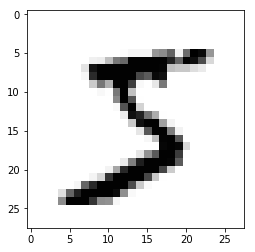

In [6]:
intlist = [int(x) for x in datalist[0].split(',')]    # 문자열 내용을 콤마(,)로 분리, 하나씩 int 형으로 변환
y = intlist[0]                                          # 첫번째 이미지의 레이블
X = np.array(intlist[1:]).reshape(28, 28)         # 레이블을 제외한 자료 즉 이미지를 28x28으로 만듦
print('image label:', y)
plt.imshow(X, cmap='Greys')                 

In [5]:
intlist[:10]

[5, 0, 0, 0, 0, 0, 0, 0, 0, 0]

함수 `read_mnist_csv()`를 이용하면 쉽고 빠르게 MNIST 자료를 활용할 수 있습니다.  다음 csv파일을 읽고 시각화하는 코드입니다. 

Reading images(data\train3.csv)...3
csv normalized X.shape=(3, 28, 28), y.shape=(3,)
X.shape=(3, 28, 28), y.shape=(3,)
Label: 5.0


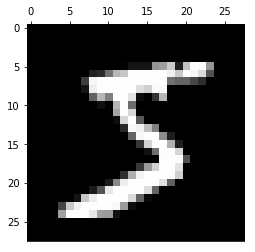

Label: 0.0


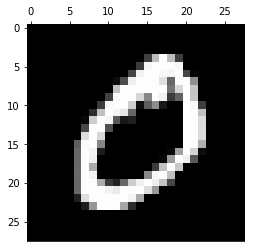

Label: 4.0


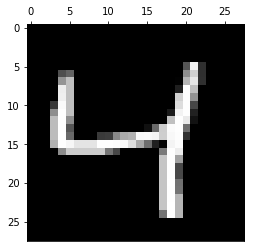

In [7]:
import joy
X, y = joy.read_mnist_csv('train3.csv')
print('X.shape={}, y.shape={}'.format(X.shape, y.shape))
for i, yi in enumerate(y):
    print('Label:', yi)
    joy.show_mnist(X[i])

------------------

__PopQuiz__: `len(datalist)`의 값은 아래의 값들 중에 어느 것과 같은가요?  
(1) 3  <br>
(2) 784  <br>
(3) 785  <br>
(4) 784x3  <br>
(5) 785x3  <br>

__JoyAnswer__: (1)

-------------

------------------

__PopQuiz__: `len(intlist)`의 값은 아래의 값들 중에 어느 것과 같은가요?  
(1) 3  <br>
(2) 784  <br>
(3) 785  <br>
(4) 784x3  <br>
(5) 785x3  <br>

__JoyAnswer__: (3)

-------------

joy 모듈에 있는 다음 함수를 사용하면 6만개의 훈련자료 중에 가장 앞부분 200장의 이미지를 읽어들이고, 시각화를 할 수 있습니다. 

X.shape=(60000, 28, 28), y.shape=(60000,)


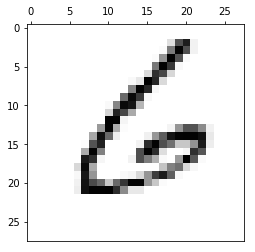

In [11]:
import joy
(X, y), (Xt, yt) = joy.load_mnist(normalize = False, flatten = False)
print("X.shape={}, y.shape={}".format(X.shape, y.shape))
joy.show_mnist(X[-2], inverted=True)

우리가 MNIST 자료를 시각화하기 위해 사용한 함수는 다음과 같이 몇개의 인자들이 있습니다. 

`show_mnist(image, inverted = False)`

- image -- 입력된 이미지들의 자료, 형상(28, 28)
- inverted -- if True, 이미지 바탕의 검은색으로 흰색으로, 글자의 흰색은 검은색으로 반전됨

단 하나의 이미지만 시각화하면, 다음과 같이 이미지의 상세한 부분까지 볼 수 있습니다. 

MNIST 자료 안에 있는 이미지를 한번에 여러 개를 시각화하려면 다음 함수를 사용하십시오. 

`show_mnist_grid(image, inverted = False, figsize = 10, ncols = 10, maxgrid = 100)`

- ncols -- 이미지를 출력할 때, 한 행에 몇개의 이미지를 출력할지 결정하는 열의 수입니다. 
- maxgrid -- 최대로 시각화하기 위한 이미지의 갯수, 기본값으로 100개까지 출력합니다. 

다음 코드는 MNIST 자료에서 세 개의 이미지 자료를 읽고, 레이블과 이미지를 차례대로 하나씩출력합니다. 

Label: 5


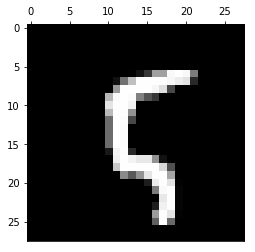

Label: 7


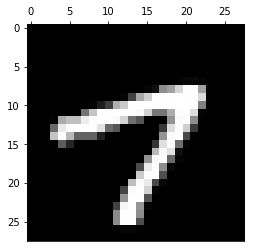

Label: 1


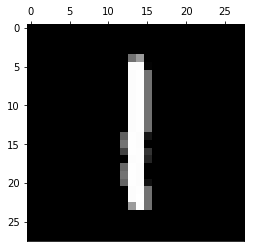

In [10]:
import joy
n_th = 100
(X, y), (Xt, yt) = joy.load_mnist(flatten = False)
for i, yi in enumerate(y[n_th:n_th+3]):
    print('Label:', y[n_th + i])
    joy.show_mnist(X[n_th + i])

다음 코드는 MNIST에서 50개의 이미지 자료를 읽고 레이블과 이미지를 한꺼번에 출력합니다. 

Label:  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


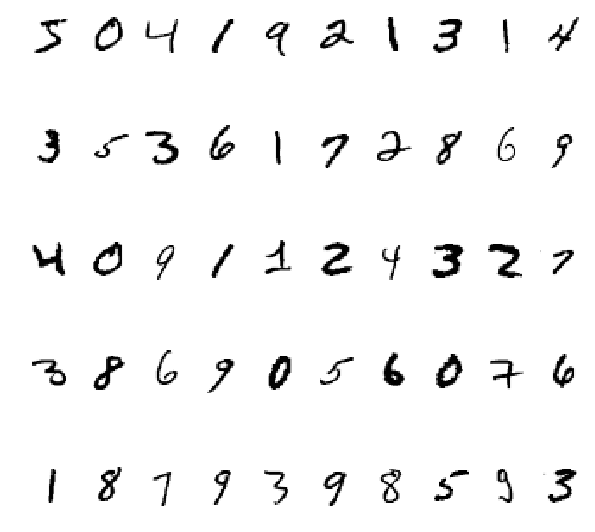

In [10]:
(X, y), (Xt, yt) = joy.load_mnist(flatten = False)
print('Label: ', y[:50])
joy.show_mnist_grid(X[:50], inverted = True)

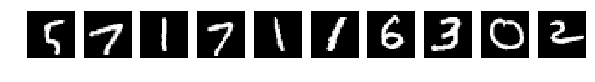

In [11]:
joy.show_mnist_grid(X[100:110])

---------------

__JoyQuiz__: 자료 X에서 첫 10개의 이미지와 레이블을 출력하기위한 코드를 완성하십시오. 

`print('Label:', y[____])` <br>
`show_mnist_grid(X[____])`

(1) 10 <br>
(2) :10 <br>
(3) 10: <br>
(4) 0, 10

JoyAnswer: (2)

---------

---------------

__JoyQuiz__: MNIST 훈련 자료의 마지막 이미지의 숫자는 무엇입니까?  `___________`

__JoyAnswer__: 8



---------

## 6. MNIST 훈련자료의 전처리
우리는 MNIST 데이터 파일에서 데이터를 읽고, 그 데이터를 이해하고 시각화하는 방법을 알아냈습니다. 우리는 우리의 신경망을 이 데이터를 가지고 학습하기를 원합니다. 먼저 우리는 이 데이터를 신경망에게 전해줄 수 있도록 데이터를 잘 준비할 필요가 있습니다.
우리는 입력 데이터와 출력값이 활성화 함수의 영역 안에 있을 때 신경망이 더 잘 동작하는 것을 이전에 경험했습니다.
그렇게 하기 위해서 우리가 제일 먼저 해야할 일은 0부터 255 사이의 입력 큰 색상 값들을 0.01에서 1.0 사이의 작은 값들로 재구성 하는 것입니다. 이전에 입력 값이 0일 때 가중치가 갱신하지 못하는 문제를 이전에 보았기 때문에 가장 작은 값을 일부러 0.01로 정하였습니다. 입력 값이 1.0인 것은 아무 문제가 없기 때문에 가장 큰 값을 0.99로 정하지 않았습니다. 출력값이 1.0에 도달하지 못하게 하는 것들만 피해주면 됩니다.

0부터 255 사이에 있는 입력 값들을 0.01에서 1.0 사이로 재구성 하였습니다.
우리는 0부터 255사이의 입력 값들에 255.0으로 나눈 후에, 0.99를 곱하여 0.0에서 0.99까지의 범위로 만들어야 합니다. 그리고 0.01을 더해줘서 우리가 원하는 0.01에서 1.00으로 범위를 이동시킵니다. 다음의 Python 코드로 이러한 작업 과정을 보여주는데,  여러분이 직접 실행해보고, 그 결과가 0.01에서 1.00 사이인지 확인해 보세요.


In [9]:
print(X.shape)
X_std = X[:]
X_std = np.asfarray(X)/255.0 * 0.99 + 0.01
print(X_std[0])

(60000, 28, 28)
[[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
   0.01        0.01        0.01        0.01        0.01        0.01        0.01
   0.01        0.01        0.01        0.01        0.01        0.01        0.01
   0.01        0.01        0.01        0.01        0.01        0.01        0.01      ]
 [ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
   0.01        0.01        0.01        0.01        0.01        0.01        0.01
   0.01        0.01        0.01        0.01        0.01        0.01        0.01
   0.01        0.01        0.01        0.01        0.01        0.01        0.01      ]
 [ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
   0.01        0.01        0.01        0.01        0.01        0.01        0.01
   0.01        0.01        0.01        0.01        0.01        0.01        0.01
   0.01        0.01        0.01        0.01        0.01        0.01        0.01      ]
 [ 

## 7. 신경망의 설계

이제 신경망의 입력자료에 대하여 전처리 작업을 마쳤는데, 입력층의 노드의 갯수는 몇개가 되나요? 입력층 노드의 수는 입력자료에 의하여 정해진다고 배웠습니다. 입력층의 노드 수는 24x24 = 784개 되어야 합니다.  아래 그림처럼 말입니다. 복잡하죠? 이것도 일부만 간단히 그린 것이랍니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/784-100-10NN.png?raw=true" width="500">
<center>그림 4: MNIST 신경망의 구조(1)</center>

그러면, 출력층 뉴론의 수는 얼마가 되어야 할까요?  입력 자료처럼 28x28 모양의 이미지가 나와야 할까요? 물론, 그럴 필요가 없을 것입니다. 

입력은 28x28 = 784 크기의 숫자들의 집합이지만, 출력은 주어진 입력에 대해 그 입력된 이미지가 0에서 9사이의 한 숫자임을 말해주면 되는 것입니다. 이것은 주어지는 이미지를 0부터 9사이의 숫자 하나로 분류하는 문제입니다. 정답은 0과 9사이의 숫자들 중에 하나이므로 출력층의 뉴론은 10개 있으면 된다는 말입니다. 일반적으로 분류에서는 분류하고 싶은 클래스의 수로 출력층의 뉴런의 수를 설정합니다. 

은닉층의 뉴론의 수는 어떻게 결정하나요?  솔직히 과학적이고 체계적인 방법이 없습니다.  다만, 몇가지 범위는 결정할 수 있습니다.  입력 노드의 수가 784였으므로, 은닉층 노드의 수는 784보다는 작아야 합니다.  신경망은 입력 벡터에서 어떤 특징이나 패턴을 찾아냅니다.  이런 특징과 패턴은 입력 노드 수보다는 작은 형태로 표현함으로 은닉층의 노드 수보다 작아야 합니다. 그러나 은닉층의 노드 수가 너무 적으면 더 많은 특징과 패턴을 찾아낼 수 있는 제한하게 됩니다.  또한 10개의 출력 노드가 있어야 함으로 은닉층의 노드는 10개보다 훨씬 더 많아야 합니다.   100 개 정도에서 시작하고 실험을 통해 그 수를 늘리거나 줄여 나가면 될 것입니다. 

다시 강조하지만 은닉 노드를 결정하는 체계적인 방법은 아직 없습니다. 지금까지 존재하는 가장 좋은 방법은 여러분이 문제해결을 위해 가장 적합한 결과값이 나올 때까지 실험을 반복해보는 것입니다. 이런 것을 보고 경험칙$^{empirical}$이라고 합니다. 

다음 그림과 같은 신경망을 구성할 수 있습니다. 
<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MNIST-NN2.png?raw=true" width="500">
<center>그림 5: MNIST 신경망의 구조(2)</center>

예를 들어 MNIST 자료의 처음 세 숫자(5, 0, 4)를 신경망을 통해 예측한 출력이 다음 그림과 같다고 합시다.  그림의 왼쪽 세 개의 열은 각각 입력 이미지(5, 0, 4)에 대한 예측 결과입니다. 각 출력의 결과값에서 가장 큰 값을 찾고 있는 노드가 신경망이 예측한 값입니다.  

신경망이 첫번째 이미지에 대해서는 5라고 생각하고 있습니다. 왜냐하면, 출력층에서 나오는 가장 큰 신호는 레이블이 5인 노드인 것을 확인할 수 있습니다. 우리는 노드의 시작을 0부터 했기 때문에 이 노드는 여섯 번째 노드인 것을 기억하세요. 생각보다 쉽습니다. 나머지 출력 노드들은 거의 0에 가까운 신호들을 만들었습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MNIST-output.png?raw=true" width="300">
<center>그림 6: MNIST 신경망 출력과 레이블 원-핫-인코딩</center>

그 다음 이미지($X^{(1)}=0$)에서는 신경망이 0이라고 생각하는 것을 보여줍니다. 첫번째 출력 노드가 가장 큰 값을 가지고 있네요. 이 노드는 레이블이 0인 것과 일치합니다.
마지막 예제는 조금 더 재미있습니다. 여기에서는 신경망이 레이블 4 노드가 가장 큰 값을 가지고 있습니다. 하지만 9 노드도 적당히 큰 출력값을 가지고 있습니다. 일반적으로 우리는 가장 큰 신호를 가지고 가야합니다. 하지만 마지막 이미지에 대해서는 신경망이 어|느 정도 9일 가능성도 좀 있다고 볼 수 있습니다. 어쩌면 이 숫자가 확인하기 어렵게 쓰여진 것일까요? 이런 종류의 불확실한 일이 신경망에서 발생합니다. 우리는 이 문제를 나쁘다고만 볼 것이 아니라 어떤 답이 유사했는지 알 수 있게 됩니다. 

### 원-핫-인코딩$^{one-hot \ encoding}$
만약 어떤 한 학습자료(이미지)의 레이블이 5라면, 이를 다룰 수 있는 출력 노드 10개에 대한 $y$ 만들어야 합니다. 즉 레이블 5에 해당하는 값을 1로 잡고 나머지는 0가 되어야 합니다.  다음과 같이 말입니다. 

`y = np.array([0, 0, 0, 0. 0, 1, 0, 0, 0, 0])`

배열에서 정답인 레이블만 1로 만들고 나머지는 모두 0입니다. 이런 것은 원-핫-인코딩$^{one \ hot \ encoding}$형상으로 레이블 $y^{(0)}, y^{(1)}, y^{(2)}, ..., y^{(m)}$ 를 준비해야 합니다. 여기서 m은 훈련자료$^{examples}$의 수입니다.  각 $y^{(i)}$는 10개의 원소가 있는 벡터이며, 한 개만 1이고 나머지는 모두 0입니다.  

함수 `one_hot_encoding()`는 MNIST의 레이블 `y`와 출력층의 노드의 수 `n_y`로 모든 레이블에 상응하는 원-핫-인코딩하여 `m` 개의 벡터로 구성된 행렬 `yhot`을 반환합니다.

In [10]:
def one_hot_encoding(y, n_y, modified=True):   
    """y -- labels for training sets
             numpy array of m_samples, contains the target class labels for each training example.
             For example, y = [2, 1, 5, 9] -> 4 training samples, and the ith sample has label y[i]
       n_y -- number of neurons in output layer
       modified -- if False, use 0 and 1 only; Use 0.01 and 0.99 instead of 0 and 1, respectively.
       
       returns one-hot-encoding vector by y, its shape (m, n_y)
             m is the number of output labels or len(y).
             For each row, the ith index will be "hot", or 1, to represent that index being the label.
    """
    yhot =  np.eye(n_y)[np.array(y, dtype='int32').flatten()]  
    if modified:
        yhot[yhot == 0] = 0.01
        yhot[yhot == 1] = 0.99
    return yhot

- `np.eye(n_y)`는 `n_y x n_y`의 단위행렬$^{identity \ matrix}$를 만들어 냅니다.  단위행렬이란 주 대각선이 전부 1이고, 나머지 원소들은 0인 행렬입니다.  여기서는 `n_y = 10` 이므로, `np.eye(n_y)`는 `10x10` 단위행렬을 반환합니다. 
- `np.eye(n_y)` 다음에 나오는 `[  ]`안에 나오는 모든 원소들이 단위행렬의 행의 인덱스로 작용하여 단위행렬에서 해당 행을 추출하여 원-핫-인코딩 행렬을 만들어 냅니다.  다음 그림을 참조하십시오.
- 함수에서 우리가 설정한 `y`는 이미 `numpy array`이므로, `np.array(y)`대신 `y`를 사용하는 것도 가능합니다.  다만, 혹시 사용자가 `y`를 `list`형식을 보내도 코드가 작동하도록 하기 위해 여기서는 불필요한 `np.array()`로 변환을 시도하는 것입니다. `flatten()`도 같은 이유입니다. 
- 때때로 계산의 편의상 0와 1대신 0.01과 0.99를 사용합니다. 시그모이드 함수는 결코 0과 1일 출력하지 못하듯이 말입니다.

\begin{align}
\mathbf{yhot = np.eye(n_y)[y]} = \pmatrix{ 1 & 0 & 0 & 0 & 0 & \cdots & 0 \\ 
                                  0 & 1 & 0 & 0 & 0 & \cdots & 0 \\ 
                                  0 & 0 & 1 & 0 & 0 & \cdots & 0 \\                                  
                                  0 & 0 & 0 & 1 & 0 & \cdots  & 0 \\ 
                                  \vdots & \vdots & \vdots & \vdots & \vdots & \cdots & \vdots \\
                                  0 & 0 & 0 & 0 & 0 & \cdots  & 0 \\ 
                                  0 & 0 & 0 & 0 & 0 & \cdots  & 0 \\  
                                  0 & 0 & 0 & 0 & 0 & \cdots  & 1 \\}
\pmatrix{5 \\ 0 \\  4 \\  1 \\ 9 \\ \vdots \\ \vdots \\ \vdots \\ 3} 
 =\pmatrix{ 0 & 0 & 0 & 0 & 0 & 1 & \cdots & 0 \\ 
                                  1 & 0 & 0 & 0 & 0 & 0 & \cdots & 0 \\ 
                                  0 & 0 & 0 & 0 & 1 & 0 & \cdots & 0 \\                                  
                                  0 & 1 & 0 & 0 & 0 & 0 & \cdots  & 0 \\ 
                                  0 & 0 & 0 & 0 & 0 & 0 & \cdots  & 1 \\ 
                                  \vdots \\
                                  0 & 0 & 0 & 0 & 0 & 0 & \cdots  & 0 \\ 
                                  0 & 0 & 0 & 0 & 0 & 0 & \cdots  & 0 \\  
                                  0 & 0 & 0 & 1 & 0 & 0 & \cdots  & 0 \\}
\end{align}

함수 `one_hot_decoding()`는 원-핫-인코딩한 yhot 벡터 혹은 행렬을 `m` 개의 원소로 구성된 레이블로 복원하여 반환합니다.  

In [11]:
def one_hot_decoding(yhot):
    """ decodes one-hot-encoding vector into 1-d numpy array
        yhot -- one hot encoded numpy array
        returns 
        1-d numpy array
    """
    return np.argmax(yhot, axis=1)

__JoyQuiz__: MNIST 자료를 신경망 훈련 자료로 사용할 때, 해당 레이블에 대한 `one_hot_encoding()`이 반환하는 `yhot`의 형상은 무엇입니까? 

(1) 10 x 10  <br>
(2) 10 x 60000  <br>
(3) 60000 x 10 <br>

__JoyAnswer__: (3)

## Histogram of Digit

In [3]:
import joy
import numpy as np

(X, y), (Xt, yt) = joy.load_mnist(normalize = False, flatten = False)
print("X.shape={}, y.shape={}".format(X.shape, y.shape))
print("Xt.shape={}, yt.shape={}".format(X.shape, y.shape))

hist  = np.bincount(yt)
print('Digit Histogram for Test dataset')
for i, count in enumerate(hist):
    print(i, " : ", count)

X.shape=(60000, 28, 28), y.shape=(60000,)
Xt.shape=(60000, 28, 28), yt.shape=(60000,)
Digit Histogram for Test dataset
0  :  980
1  :  1135
2  :  1032
3  :  1010
4  :  982
5  :  892
6  :  958
7  :  1028
8  :  974
9  :  1009


#### 참고자료
- https://github/WegraLee/deep-learning-from-scratch

## 학습 정리
- MNIST Dataset 이해
- MNIST Dataset 사용법
- MNIST Dataset 학습 신경망 설계 


----------
_For God so loved the world that he gave his one and only Son, that whoever believes in him shall not perish but have eternal life. John3:16_